<a href="https://colab.research.google.com/github/JunHL96/PyTorch-Course/blob/main/03_pytorch_computer_vision_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1rujxvXtdzHOj_xrNlNz_7dNAMp6ZQYps" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/JunHL96/PyTorch-Course/blob/main/03_pytorch_computer_vision_notes.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/03_pytorch_computer_vision.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=50417)

# 03. PyTorch Computer Vision


[Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog ([binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)).

Or whether a photo is of a cat, dog or chicken ([multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)).

Or identifying where a car appears in a video frame ([object detection](https://en.wikipedia.org/wiki/Object_detection)).

Or figuring out where different objects in an image can be separated ([panoptic segmentation](https://arxiv.org/abs/1801.00868)).

![example computer vision problems](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-problems.png)
*Example computer vision problems for binary classification, multiclass classification, object detection and segmentation.*

## Where does computer vision get used?


If you use a smartphone, you've already used computer vision.

Camera and photo apps use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.

Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can be described in a visual sense can be a potential computer vision problem.

## What we're going to cover



We're going to apply the PyTorch Workflow we've been learning in the past couple of sections to computer vision.

![a PyTorch workflow with a computer vision focus](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-pytorch-computer-vision-workflow.png)


Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## 0. Computer vision libraries in PyTorch



Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Device-Agnostic Code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

print(f"Using device: {device}")

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

Using device: cuda
PyTorch version: 2.5.1+cu121
torchvision version: 0.20.1+cu121


## 1. Getting a dataset



To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The [original MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

[FashionMNIST](https://github.com/zalandoresearch/fashion-mnist), made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

![example image of FashionMNIST](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png)
*`torchvision.datasets` contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.*

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including FashionMNIST in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # specify the directory where the dataset will be downloaded
    train=True, # indicates this is the training dataset
    download=True, # automatically downloads the dataset if not already present in the specified directory
    transform=ToTensor(), # converts images from PIL format to Torch tensors for model compatibility
    target_transform=None # no additional transformation applied to labels (e.g., leave labels as integers)
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data", # specify the directory where the dataset will be downloaded
    train=False, # indicates this is the testing dataset
    download=True, # automatically downloads the dataset if not already present in the specified directory
    transform=ToTensor() # converts images from PIL format to Torch tensors for consistency with training data
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.87MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.91MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 21.9MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Let's check out the first sample of the training data.

In [3]:
# See first training sample
image, label = train_data[0] # Access the first data sample (image, label pair) from the training dataset
image, label # Display the image (as a tensor) and its corresponding label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#### Class Names

In [4]:
class_names = train_data.classes    # Get the list of class names
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### Class-to-Index Mapping

In [5]:
class_to_idx = train_data.class_to_idx  # Get the mapping of class names to indices
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Above, we see the class names and their corresponding indices defined in the dataset for FashionMNIST.

### 1.1 Input and output shapes of a computer vision model



We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [6]:
class_names = train_data.classes
# What's the shape of the image?
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

![example input and output shapes of the fashionMNIST problem](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png)
*Various problems will have various input and output shapes. But the premise remains: encode data into numbers, build a model to find patterns in those numbers, convert those patterns into something meaningful.*

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known as the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [7]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

So we've got 60,000 training samples and 10,000 testing samples. The amount in the training and testing datasets are predefined in some cases like MNIST, FashionMNIST, etc.

What classes are there?

We can find these via the `.classes` attribute.

In [8]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Sweet! It looks like we're dealing with 10 different kinds of clothes.

Because we're working with 10 different classes, it means our problem is **multi-class classification**.

Let's get visual.

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


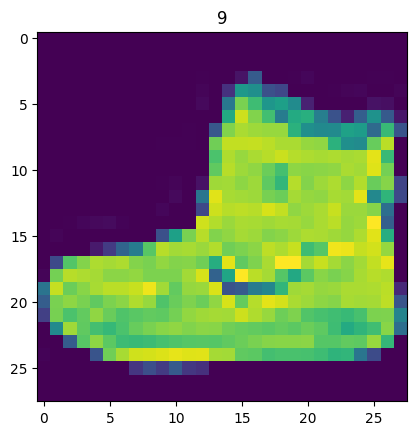

In [9]:
import matplotlib.pyplot as plt # Import Matplotlib for visualization

image, label = train_data[0] # Retrieve the first training sample (image and label pair)
print(f"Image shape: {image.shape}") # Print the shape of the image tensor (e.g., [1, 28, 28])

plt.imshow(image.squeeze()) # Remove the extra dimension (e.g., [1, 28, 28] -> [28, 28]) because imshow expects a 2D array
plt.title(label); # Set the title of the plot to the label

We can turn the image into grayscale using the `cmap` parameter of `plt.imshow()`.

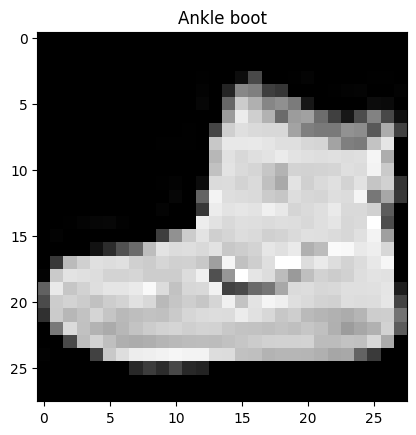

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Beautiful, well as beautiful as a pixelated grayscale ankle boot can get.

Let's view a few more.

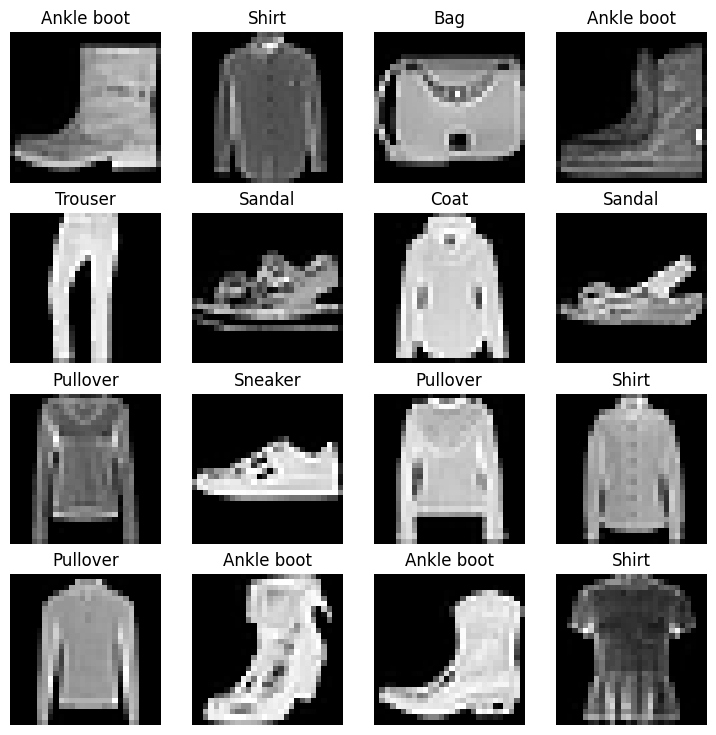

In [11]:
# Plot more images
torch.manual_seed(42) # Set a random seed for reproducibility
fig = plt.figure(figsize=(9, 9)) # Create a figure with specified size for plotting
rows, cols = 4, 4 # Define the number of rows and columns for the grid (4x4 grid)
for i in range(1, rows * cols + 1): # Loop through grid positions (16 total images)
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # Get a random index from the training dataset NOTE: see explanation below
    img, label = train_data[random_idx] # Retrieve the image and its corresponding label using the random index
    fig.add_subplot(rows, cols, i) # Add a subplot to the grid at the ith position
    plt.imshow(img.squeeze(), cmap="gray") # Display the image; squeeze removes extra dimensions, and cmap="gray" ensures grayscale
    plt.title(class_names[label]) # Set the title of the subplot to the class name corresponding to the label
    plt.axis(False); # Remove axis ticks and labels for a cleaner visualization

### NOTE

#### Why `.item()` is needed:



- `torch.randint()` returns a tensor (e.g., `tensor([42])`), even if it contains a single value.
- `.item()` extracts the scalar value from the tensor, converting it into a standard Python integer (e.g., `42`), which is required for indexing `train_data`.



#### Why `size=[1]` is needed:



- `size=[1]` tells `torch.randint()` to generate a single random number (1 element in the output tensor).
- Without it, you would need to explicitly pass a scalar shape for randomness.

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

> **Question:** Do you think the above data can be modeled with only straight (linear) lines? Or do you think you'd also need non-straight (non-linear) lines?

## 2. Prepare DataLoader

Now that our dataset is ready, the next step is to organize it using a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), commonly referred to as `DataLoader`.

Right now, our data is in the form of PyTorch datasets. We can use a `DataLoader` to turn it into an iterable sequence of batches.

### What is a DataLoader?

A `DataLoader` serves as an efficient way to load data into your model for both training and inference. It transforms a large `Dataset` into an iterable sequence of smaller subsets called **batches** or **mini-batches**. The size of these batches is determined by the `batch_size` parameter.

### Why Use Batches?

- **Computational Efficiency:** Processing the entire dataset at once can be resource-intensive and impractical for large datasets. By dividing the data into smaller batches, you reduce memory usage and speed up computations.
  
- **Frequent Updates:** Using mini-batches allows your model to update its parameters more frequently. Instead of waiting to process the entire dataset before making an update (which happens once per epoch), updates occur after each mini-batch, leading to faster convergence. In other words, it gives our neural network more chances to update its gradients per epoch.

### Choosing a Batch Size

A good starting point for the `batch_size` is **32**. This value strikes a balance between training speed and model performance. However, since `batch_size` is a **hyperparameter**, you can experiment with different values to see what works best for your specific problem. Common batch sizes are powers of 2, such as 32, 64, 128, 256, and 512.

![Batched Dataset Example](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png)
*Example of batching FashionMNIST with a batch size of 32 and shuffle enabled. The batching process is similar for other datasets, varying only with the chosen batch size.*

### Implementing DataLoaders for Training and Testing

Let's create `DataLoader` instances for both our training and test datasets. This will enable efficient data handling during the model training and evaluation phases.


In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32      # How many samples per batch?

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,            # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True)          # shuffle data every epoch?

test_dataloader = DataLoader(test_data,              # dataset to turn into iterable
                            batch_size=BATCH_SIZE,   # how many samples per batch?
                            shuffle=False)           # shuffle data every epoch?

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7afe71009f30>, <torch.utils.data.dataloader.DataLoader object at 0x7afe7a281db0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


#### Why shuffle data every epoch for training, but not for testing?



- For training, shuffling the data every epoch ensures that the model is exposed to a wide variety of data patterns, which helps prevent overfitting.
- For testing, we want to see the model's performance on the same data patterns it encountered during training, so we don't want to shuffle it.

#### Check out what's inside the training dataloader

In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))  # Retrieve one batch of features (inputs) and labels (targets) from the dataloader
train_features_batch.shape, train_labels_batch.shape  # Output the shapes of the features and labels in the batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

#### Purpose and Importance of `train_features_batch` and `train_labels_batch`



1. **Understanding Data Structure:**
   - **Purpose:** By fetching a single batch and inspecting its shape, you gain insight into how your data is organized.
   - **Why It Matters:** Knowing the dimensions helps ensure that your data aligns with the expected input requirements of your neural network. For instance, if your model expects inputs of shape `[batch_size, channels, height, width]`, verifying this helps prevent shape mismatches.
      * **Note**: In PyTorch, data is often represented as tensors with dimensions in the format `[batch_size, channels, height, width]` (NCHW format).

2. **Verifying DataLoader Configuration:**
   - **Purpose:** This step acts as a sanity check to confirm that the `DataLoader` is correctly batching and loading your data.
   - **Why It Matters:** Misconfigurations like incorrect `batch_size` or improper shuffling can lead to issues during training. Ensuring that the loader behaves as expected helps avoid runtime errors and improves training efficiency.

3. **Debugging and Troubleshooting:**
   - **Purpose:** If you encounter unexpected behaviors or errors later in your training process, knowing the exact shape and structure of your data can help pinpoint issues.
   - **Why It Matters:** For example, if your model throws an error about mismatched dimensions, you can refer back to these shape checks to identify the discrepancy.

4. **Performance Optimization:**
   - **Purpose:** Understanding the batch size and data dimensions can aid in optimizing training performance, especially when leveraging hardware accelerators like GPUs.
   - **Why It Matters:** Larger batch sizes can speed up training but may require more memory. Balancing these factors based on your data shapes ensures efficient utilization of resources.


#### Show a Sample

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


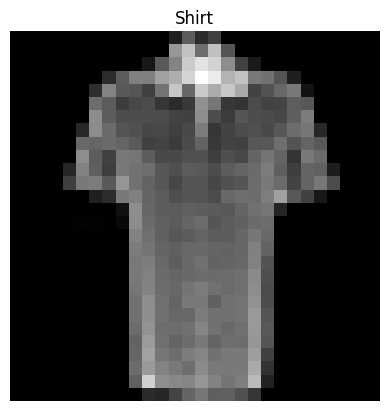

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Building a Baseline Model



Data has been successfully loaded and prepared!

Now, let's construct a **baseline model** by subclassing `nn.Module` from PyTorch.

When starting to build a series of ML modelling experiments, it's best practice to start with a **baseline model** that provides a starting point to improve upon.



### What is a Baseline Model?



A **baseline model** serves as the simplest possible model to establish a performance benchmark. It provides a starting point from which more complex models can be developed and improvements can be measured.



### Building the Baseline Model



Our baseline model will consist of two [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers. These layers are fully connected layers that apply a linear transformation to the input data.



#### A Slight Variation for Image Data



Since we are working with image data, we'll introduce a slight modification by incorporating the [`nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer at the beginning of our model.

- **`nn.Flatten()`**: This layer transforms multi-dimensional input tensors into a single-dimensional vector. For image data, which typically has dimensions corresponding to color channels, height, and width, flattening simplifies the data structure, making it easier to process with linear layers.



### Why Use `nn.Flatten()`?



Flattening the tensor reduces its complexity by collapsing all dimensions except the batch size into one. This is particularly useful when transitioning from convolutional layers, which handle multi-dimensional data, to linear layers, which expect one-dimensional input.

By starting with `nn.Flatten()`, we ensure that our image data is appropriately formatted for the linear layers that follow, enabling effective training of our baseline model.

### Coding the Baseline Model

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()  # Initialize the Flatten layer to convert multi-dimensional tensors to 1D

# Get a single sample
x = train_features_batch[0]  # Select the first image from the training features batch

# Flatten the sample
output = flatten_model(x)  # Apply the Flatten layer to transform the image tensor into a 1D vector

# Print output shape
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")  # Display original tensor shape
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")  # Display flattened tensor shape

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]




### Benefits for `nn.Linear` Layers



`nn.Linear()` layers are designed to work with feature vectors. They expect inputs to be in a flat, one-dimensional format where each element of the vector represents a distinct feature. By providing the data as a feature vector, `nn.Linear()` can effectively apply linear transformations to learn the relationships between features.



### Building Our First Model



Let's create our initial model by using `nn.Flatten()` as the first layer. This setup ensures that our image data is properly formatted for the subsequent linear layers, allowing the model to process and learn from the pixel data efficiently.


In [16]:
from torch import nn  # Import PyTorch's neural network module

class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,     # Number of input features (e.g., 784 for 28x28 images)
                 hidden_units: int,    # Number of neurons in the hidden layer
                 output_shape: int):   # Number of output classes (e.g., 10 for classification)
        super().__init__()  # Initialize the parent nn.Module class
        self.layer_stack = nn.Sequential(
            nn.Flatten(),  # Flatten multi-dimensional input into a 1D vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),  # First linear layer: input to hidden
            nn.Linear(in_features=hidden_units, out_features=output_shape)   # Second linear layer: hidden to output
        )

    def forward(self, x):
        return self.layer_stack(x)  # Pass input through the sequential layers

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:
* `input_shape=784` - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
* `hidden_units=10` - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with `10`.
* `output_shape=len(class_names)` - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running `model_0` on CPU vs. a similar model on GPU soon).

In [17]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784,               # 784 for 28x28 images
                              hidden_units=10,               # units in hidden layer
                              output_shape=len(class_names)  # one for each class
                             )#to.(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### Running a Small Test to test shapes and inputs of `model_0`

In [18]:
dummy_x = torch.rand([1, 1, 28, 28])#.to(device)
model_0(dummy_x), model_0(dummy_x).shape

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

### 3.1 Setup loss, optimizer and evaluation metrics



Since we're working on a classification problem, let's bring in our [`helper_functions.py` script](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py) and subsequently the `accuracy_fn()` we defined in [notebook 02](https://www.learnpytorch.io/02_pytorch_classification/).

> **Note:** Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the [TorchMetrics package](https://torchmetrics.readthedocs.io/en/latest/).

In [19]:
import requests  # Import the requests module to handle HTTP requests
from pathlib import Path  # Import Path from pathlib to work with file paths

# Check if the helper_functions.py file already exists in the current directory
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")  # Notify that the file exists
else:
    print("Downloading helper_functions.py")  # Notify that the file is being downloaded
    # Send a GET request to download the raw helper_functions.py script from the specified GitHub URL
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    # Open a file named "helper_functions.py" in write-binary mode and save the downloaded content
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)  # Write the content of the request to the file

In [20]:
# Import accuracy metric from the helper_functions.py script
from helper_functions import accuracy_fn  # Custom accuracy function for evaluation
# Note: Alternatively, you could use the TorchMetrics package for prebuilt metrics like Accuracy.
# Example: torchmetrics.Accuracy(task='multiclass', num_classes=len(class_names)).to(device)

# Setup loss function
loss_fn = nn.CrossEntropyLoss()  # Define the loss function for classification tasks (e.g., categorical cross-entropy)


# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),    # Use Stochastic Gradient Descent (SGD) optimizer
                            lr=0.1)


### 3.2 Creating a Function to Time Our Experiments



With the loss function and optimizer set up, we're ready to begin training our model. However, before diving into training, it's beneficial to conduct an experiment to measure and compare the training times on different hardware—specifically, between a **CPU** and a **GPU**.



#### Why Measure Training Time?



Understanding how long your model takes to train on different hardware can help you make informed decisions about resource allocation, optimize your workflow, and identify potential bottlenecks in your training process.



#### Setting Up the Timing Function



To accurately measure the training time, we'll create a **timing function**. This function will utilize the [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) from Python's [`timeit` module](https://docs.python.org/3/library/timeit.html). The `timeit` module provides a simple way to time small bits of Python code, and `default_timer()` offers the most accurate clock available on your platform.



#### Steps to Create the Timing Function



1. **Import the Required Function:**
   - We'll import `default_timer` from the `timeit` module to track the start and end times of our training process.

2. **Define the Timing Function:**
   - The function will accept the model, data loaders, loss function, optimizer, number of epochs, and the device (CPU or GPU) as parameters.
   - It will record the time before and after the training loop to calculate the total training duration.

3. **Run the Experiment:**
   - We'll train the same model twice: once on the CPU and once on the GPU.
   - By comparing the recorded times, we can observe the performance difference between the two hardware setups.


In [21]:
from timeit import default_timer as timer  # Import the default_timer function for high-resolution timing

def print_train_time(start: float, end: float, device: torch.device = None):
    """
    Prints the difference between start and end times, indicating the training duration on a specific device.

    Args:
        start (float): Start time of computation (preferably obtained using timeit.default_timer()).
        end (float): End time of computation.
        device (torch.device, optional): The device on which the computation was performed (e.g., CPU or GPU). Defaults to None.

    Returns:
        float: The total time taken for training in seconds.
    """
    total_time = end - start  # Calculate the total training time by subtracting start time from end time
    print(f"Train time on {device}: {total_time:.3f} seconds")  # Print the training time with device information
    return total_time  # Return the total training time

### 3.3 Creating a Training Loop and Training a Model on Batches of Data



Great! We have all the necessary components: a timer, loss function, optimizer, model, and data.

Next, we'll create training and testing loops to train and evaluate our model.

Since our data is now batched, we'll introduce an additional loop to handle these batches. Our batches are managed by the `DataLoader`s: `train_dataloader` for training data and `test_dataloader` for testing data.

Each batch contains `BATCH_SIZE` samples of features (`X`) and labels (`y`). With `BATCH_SIZE=32`, each batch includes 32 images and their corresponding targets.

Because we're processing data in batches, we'll calculate loss and evaluation metrics **per batch** instead of across the entire dataset. This requires dividing the accumulated loss and accuracy by the number of batches in each dataloader.

Here’s the process:
1. Iterate over epochs.
2. For each epoch, loop through training batches to perform training steps and compute training loss per batch.
3. Loop through testing batches to perform testing steps and compute testing loss per batch.
4. Display progress and results.
5. Track the total training time.

It involves several steps, but as always, if you’re unsure, just start coding!

In [22]:
from tqdm.auto import tqdm  # Import tqdm for displaying progress bars
import torch
from timeit import default_timer as timer

# Set the random seed for reproducibility
torch.manual_seed(42)

# Start the training timer to measure how long the training process takes
train_time_start_on_cpu = timer()

# Define the number of training epochs (full passes through the dataset)
epochs = 3

# Training and testing loop iterates over the number of epochs
for epoch in tqdm(range(epochs), desc="Epochs"):
    print(f"Epoch: {epoch}\n-------")

    ### Training Phase
    train_loss = 0  # Initialize cumulative training loss for the epoch

    # Enumerate(train_dataloader) provides the batch index, input data X, and corresponding labels y for each training batch
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()  # Set model to training mode to enable behaviors like dropout and batch normalization

        # 1. Forward pass: compute model predictions for the input batch
        y_pred = model_0(X)

        # 2. Compute loss between predictions and true labels
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()  # Accumulate loss to compute average later

        # 3. Zero out gradients from the previous optimization step
        optimizer.zero_grad()

        # 4. Backward pass: compute gradients of the loss w.r.t. model parameters
        loss.backward()

        # 5. Update model parameters based on computed gradients
        optimizer.step()

        # Optional: Print progress every 400 batches to monitor training
        if batch % 400 == 0:
            processed = batch * len(X)  # Number of images processed so far
            total = len(train_dataloader.dataset)  # Total number of images in the dataset
            print(f"Processed {processed}/{total} images during training")

    # Calculate average training loss for the epoch by dividing total loss by number of batches
    train_loss /= len(train_dataloader)

    ### Testing Phase
    test_loss, test_acc = 0, 0  # Initialize cumulative test loss and accuracy
    model_0.eval()  # Set model to evaluation mode to disable dropout and batch normalization

    with torch.inference_mode():  # Disable gradient calculations for faster computations during evaluation
        for X_test, y_test in test_dataloader:
            # 1. Forward pass: compute model predictions on the test data
            test_pred = model_0(X_test)

            # 2. Compute loss between predictions and true labels, accumulate the loss
            test_loss += loss_fn(test_pred, y_test).item()

            # 3. Calculate accuracy by comparing predicted labels to true labels
            #    `argmax(dim=1)` selects the class with the highest predicted score
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate average test loss by dividing total test loss by number of test batches
    test_loss /= len(test_dataloader)

    # Calculate average test accuracy by dividing total correct predictions by number of test batches
    test_acc /= len(test_dataloader)

    # Display training and testing metrics for the current epoch
    print(f"Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

# End the training timer to measure total training duration
train_time_end_on_cpu = timer()

# Calculate and print the total training time using a custom function `print_train_time`
# This function likely formats and displays the elapsed time along with the device used
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)  # Retrieves the device (CPU/GPU) the model is on
)

Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Processed 0/60000 images during training
Processed 12800/60000 images during training
Processed 25600/60000 images during training
Processed 38400/60000 images during training
Processed 51200/60000 images during training
Train Loss: 0.59039 | Test Loss: 0.50954 | Test Accuracy: 82.04%
Epoch: 1
-------
Processed 0/60000 images during training
Processed 12800/60000 images during training
Processed 25600/60000 images during training
Processed 38400/60000 images during training
Processed 51200/60000 images during training
Train Loss: 0.47633 | Test Loss: 0.47989 | Test Accuracy: 83.20%
Epoch: 2
-------
Processed 0/60000 images during training
Processed 12800/60000 images during training
Processed 25600/60000 images during training
Processed 38400/60000 images during training
Processed 51200/60000 images during training
Train Loss: 0.45503 | Test Loss: 0.47664 | Test Accuracy: 83.43%
Train time on cpu: 27.630 seconds


Nice! Looks like our baseline model did fairly well.

It didn't take too long to train either, even just on the CPU, I wonder if it'll speed up on the GPU?

Let's write some code to evaluate our model.

## 4. Make predictions and get Model 0 results



Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function.

In [23]:
import torch

# Set the random seed for reproducibility
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,                # PyTorch model to evaluate
              data_loader: torch.utils.data.DataLoader,  # DataLoader containing evaluation data
              loss_fn: torch.nn.Module,              # Loss function to compute loss
              accuracy_fn: callable):                # Function to compute accuracy
    """
    Evaluates the given model on the provided dataset and returns performance metrics.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): A PyTorch DataLoader containing the data to predict on.
        loss_fn (torch.nn.Module): A PyTorch loss function.
        accuracy_fn (callable): A function for computing accuracy.

    Returns:
        dict: A dictionary containing the model's name, average loss, and average accuracy.
    """

    loss, acc = 0, 0  # Initialize cumulative loss and accuracy

    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)

    with torch.inference_mode():  # Disable gradient calculations for faster computation and reduced memory usage
        for X, y in data_loader:
            # Move data to the same device as the model (e.g., CPU or GPU)
            X, y = X.to(next(model.parameters()).device), y.to(next(model.parameters()).device)

            # Forward pass: compute the model's predictions
            y_pred = model(X)

            # Compute the loss for the current batch and accumulate it
            loss += loss_fn(y_pred, y)

            # Compute the number of correct predictions and accumulate it
            # y_pred.argmax(dim=1) selects the class with the highest score as the predicted label
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Calculate average loss over all batches
        loss /= len(data_loader)

        # Calculate average accuracy over all batches
        acc /= len(data_loader)

    # Prepare the results dictionary with model name, average loss, and average accuracy
    return {
        "model_name": model.__class__.__name__,  # Retrieves the class name of the model
        "model_loss": loss.item(),               # Converts the loss tensor to a Python float
        "model_acc": acc                         # Average accuracy as a float
    }

# Example Usage:

# Assuming you have a trained model `model_0`, a test DataLoader `test_dataloader`,
# a loss function `loss_fn`, and an accuracy function `accuracy_fn` defined elsewhere.

# Evaluate model_0 on the test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

# Display the evaluation results
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


### Clarification of the use of `enumerate` in the training loop and its omission in the evaluation loop



#### 1. Did We Absolutely Have to Use `enumerate` when training our model?



**Short Answer:**  
No, using `enumerate` is not mandatory. It is optional and should be used based on whether you need access to the batch index within your loop.

**Detailed Explanation:**

- **Purpose of `enumerate`:**  
  The `enumerate` function adds a counter to an iterable and returns it as an `enumerate` object. This allows you to access both the **index** (or count) and the **value** from the iterable in a single loop.

- **When to Use `enumerate`:**
  - **Logging & Monitoring:** If you want to log progress, print batch numbers, or perform actions at specific intervals (e.g., every 100 batches), `enumerate` provides the batch index essential for these tasks.
  - **Conditional Operations:** Perform certain operations only on specific batches based on their index.

- **When Not to Use `enumerate`:**
  - **No Need for Index:** If your loop logic doesn't require knowing the current batch number, you can iterate directly over the DataLoader without using `enumerate`.

**Conclusion:**  
Use `enumerate` **only** when you need the batch index for tasks like logging, conditional processing, or tracking progress. Otherwise, it's perfectly fine to iterate directly over the DataLoader.

---



#### 2. Why Use `for batch, (X, y) in enumerate(train_dataloader):` in Training but `for X, y in data_loader:` in Evaluation?



**Short Answer:**  
In the training loop, `enumerate` is used to access the batch index for logging progress, while in the evaluation loop, the batch index isn't needed, so `enumerate` is omitted.

**Detailed Explanation:**

| **Scenario** | **Loop Structure** | **Reason** |
|--------------|---------------------|------------|
| **Training** | `for batch, (X, y) in enumerate(train_dataloader):` | Need batch index for logging and conditional operations. |
| **Evaluation** | `for X, y in test_dataloader:` | No need for batch index; focus on aggregating metrics. |

- **Training Loop with `enumerate`:**
  - **Progress Logging:** The batch index (`batch`) is used to print progress messages at regular intervals, helping monitor how much of the training data has been processed.
  - **Conditional Operations:** Allows performing specific actions based on the batch number, such as adjusting learning rates or saving checkpoints dynamically.

- **Evaluation Loop without `enumerate`:**
  - **No Need for Batch Index:** During evaluation, the primary goal is to aggregate metrics like loss and accuracy over the entire dataset. The batch index doesn't provide additional value.
  - **Simplicity:** Omitting `enumerate` makes the loop cleaner and more focused on processing data rather than tracking its position.

**Conclusion:**  
In the **training loop**, `enumerate` is valuable for tracking progress, logging, and performing batch-specific operations. In the **evaluation loop**, since these needs are absent, you can iterate directly over the DataLoader without using `enumerate` for a more streamlined and efficient process.

---



#### 3. Practical Implications & Best Practices



- **Consistency:**  
  While it's not mandatory to use `enumerate` in both training and evaluation loops, maintaining consistency can improve code readability. If you foresee the need for batch indices in the future (e.g., more detailed logging during evaluation), you might opt to include `enumerate` even in the evaluation loop.

- **Performance:**  
  Using `enumerate` has negligible performance implications. The choice to use it should be driven by the necessity of accessing the batch index rather than performance concerns.

- **Code Readability:**  
  Including `enumerate` when the index is not used can introduce unnecessary complexity. Aim for simplicity by omitting it when it's not needed.

---



#### 4. Additional Recommendations



- **Device Management:**  
  Ensure that both your model and data are on the same device (CPU or GPU) to prevent runtime errors and optimize performance.

- **Gradient Clipping:**  
  To prevent exploding gradients, especially in deep networks, consider clipping gradients before the optimizer step.

- **Learning Rate Scheduling:**  
  Adjust the learning rate during training for potentially better convergence.

- **Saving Checkpoints:**  
  Periodically save model checkpoints during training to prevent loss of progress in case of interruptions.

**Example Recommendations (Conceptual):**

- **Device Handling:**  
  Move both model and data to GPU if available to leverage faster computations.

- **Progress Monitoring:**  
  Use `enumerate` in training loops for periodic logging to monitor training progress effectively.

---



#### 5. Summary



- **`X` and `y`:**  
  Represent the input data and corresponding labels for each batch, respectively.

- **`enumerate`:**  
  A Python function that adds a counter to an iterable, allowing access to both the index (`batch`) and the value (`(X, y)`) in each iteration.

- **Loop Structure Differences:**  
  - **Training Loop:** Uses `enumerate` to track batch indices for logging and conditional operations.
  - **Evaluation Loop:** Omits `enumerate` as batch indices are unnecessary for aggregating metrics.

**Understanding these components is crucial for effectively managing data flow and monitoring progress in your PyTorch models. Implement best practices to enhance code readability, maintainability, and performance.**

## 5. Setup device agnostic-code (for using a GPU if there is one)



We've seen how long it takes to train ma PyTorch model on 60,000 samples on CPU.

> **Note:** Model training time is dependent on hardware used. Generally, more processors means faster training and smaller models on smaller datasets will often train faster than large models and large datasets.

Now let's setup some [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#best-practices) for our models and data to run on GPU if it's available.

If you're running this notebook on Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [24]:
# Device-Agnostic Code
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # Defaults to CPU if NVIDIA GPU/Apple GPU aren't available

print(f"Using device: {device}")

Using device: cuda


## 6. Model 1: Building a better model with non-linearity



We learned about [the power of non-linearity in notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#6-the-missing-piece-non-linearity).

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (`nn.ReLU()`) in between each linear layer.

In [25]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shapes: int):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),  # Flatten multi-dimensional input into a 1D vector
                                         nn.Linear(in_features=input_shape, out_features=hidden_units),
                                         nn.ReLU(),     # Apply ReLU activation function
                                         nn.Linear(in_features=hidden_units, out_features=output_shapes),
                                         nn.ReLU())

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


That looks good.

Now let's instantiate it with the same settings we used before.

We'll need `input_shape=784` (equal to the number of features of our image data), `hidden_units=10` (starting small and the same as our baseline model) and `output_shape=len(class_names)` (one output unit per class).

> **Note:** Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [26]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  # 784 because of 28x28 images
                              hidden_units=10,  # 10 hidden units because we have 10 classes
                              output_shapes=len(class_names)    #  Sets the number of output neurons to match the number of classes for classification
).to(device)

next(model_1.parameters()).device   # Checks the device that model_1 is on

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics



As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [27]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and test loops



So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call `.to(device)` on our feature (`X`) and target (`y`) tensors.

For the training loop we'll create a function called `train_step()` which takes in a model, a `DataLoader` a loss function and an optimizer.

The testing loop will be similar but it'll be called `test_step()` and it'll take in a model, a `DataLoader`, a loss function and an evaluation function.

> **Note:** Since these are functions, you can customize them in any way you like. What we're making here can be considered barebones training and testing functions for our specific classification use case.

In [28]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """
    Executes one full pass through the training dataset, updating model parameters.

    Args:
        model (torch.nn.Module): The neural network model to train.
        data_loader (torch.utils.data.DataLoader): DataLoader providing training data batches.
        loss_fn (torch.nn.Module): Loss function to compute the error between predictions and targets.
        optimizer (torch.optim.Optimizer): Optimizer to update model parameters based on gradients.
        accuracy_fn (callable): Function to calculate accuracy given true and predicted labels.
        device (torch.device): Device to perform computations on (CPU or GPU). Defaults to `device`.

    Returns:
        None
    """
    train_loss, train_acc = 0, 0  # Initialize cumulative loss and accuracy for the epoch
    model.to(device)  # Move the model to the specified device (CPU or GPU)

    for batch, (X, y) in enumerate(data_loader):
        # Send input data and labels to the designated device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass: compute model predictions for the input batch
        y_pred = model(X)

        # 2. Calculate loss between predictions and true labels
        loss = loss_fn(y_pred, y)
        train_loss += loss  # Accumulate loss for averaging later

        # Calculate accuracy by comparing predicted labels to true labels
        train_acc += accuracy_fn(
            y_true=y,
            y_pred=y_pred.argmax(dim=1)  # Convert logits to predicted class labels
        )

        # 3. Zero out gradients from the previous optimization step
        optimizer.zero_grad()

        # 4. Backward pass: compute gradients of the loss w.r.t. model parameters
        loss.backward()

        # 5. Update model parameters based on computed gradients
        optimizer.step()

    # Calculate average loss and accuracy over all batches in the epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    # Print the training metrics for the epoch
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """
    Evaluates the model's performance on the test dataset without updating parameters.

    Args:
        data_loader (torch.utils.data.DataLoader): DataLoader providing test data batches.
        model (torch.nn.Module): The neural network model to evaluate.
        loss_fn (torch.nn.Module): Loss function to compute the error between predictions and targets.
        accuracy_fn (callable): Function to calculate accuracy given true and predicted labels.
        device (torch.device): Device to perform computations on (CPU or GPU). Defaults to `device`.

    Returns:
        None
    """
    test_loss, test_acc = 0, 0  # Initialize cumulative loss and accuracy for evaluation
    model.to(device)  # Move the model to the specified device (CPU or GPU)
    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)

    # Disable gradient calculations for efficiency during evaluation
    with torch.inference_mode():
        for X, y in data_loader:
            # Send input data and labels to the designated device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass: compute model predictions for the input batch
            test_pred = model(X)

            # 2. Calculate loss between predictions and true labels
            test_loss += loss_fn(test_pred, y)  # Accumulate loss for averaging later

            # Calculate accuracy by comparing predicted labels to true labels
            test_acc += accuracy_fn(
                y_true=y,
                y_pred=test_pred.argmax(dim=1)  # Convert logits to predicted class labels
            )

        # Calculate average loss and accuracy over all batches in the test dataset
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        # Print the evaluation metrics
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way, for each epoch, we're going through a training step and a testing step.

> **Note:** You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

#### Testing out our functions

In [29]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Measure the start time of the training process
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Define the number of training epochs
epochs = 3

# Loop over each epoch
for epoch in tqdm(range(epochs), desc="Training Epochs"):   # tqdm provides a progress bar, range(epochs) iterates over epochs
    print(f"Epoch: {epoch}\n---------")

    # Perform a training step: forward pass, loss computation, backward pass, and optimization
    train_step(
        data_loader=train_dataloader,   # DataLoader providing training data batches
        model=model_1,                  # The neural network model to train
        loss_fn=loss_fn,                # Loss function to compute error between predictions and targets
        optimizer=optimizer,            # Optimizer to update model parameters based on gradients
        accuracy_fn=accuracy_fn         # Function to calculate accuracy of predictions
    )

    # Perform a testing step: evaluate model performance on the test dataset
    test_step(
        data_loader=test_dataloader,     # DataLoader providing test data batches
        model=model_1,                   # The neural network model to evaluate
        loss_fn=loss_fn,                 # Loss function to compute error between predictions and targets
        accuracy_fn=accuracy_fn          # Function to calculate accuracy of predictions
    )

# Measure the end time of the training process
train_time_end_on_gpu = timer()

# Calculate and print the total training time
total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,     # Start time of training
    end=train_time_end_on_gpu,         # End time of training
    device=device                      # Device used for training (CPU or GPU)
)

Training Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cuda: 33.642 seconds


Excellent!

Our model trained but the training time took longer?

> **Note:** The training time on CUDA vs CPU will depend largely on the quality of the CPU/GPU you're using. Read on for a more explained answer.

> **Question:** "I used a GPU but my model didn't train faster, why might that be?"
>
> **Answer:** Well, one reason could be because your dataset and model are both so small (like the dataset and model we're working with) the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there.
>
> There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.
>
> So for smaller models and datasets, the CPU might actually be the optimal place to compute on.
>
> But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.
>
> However, this is largely dependent on the hardware you're using. With practice, you will get used to where the best place to train your models is.

Let's evaluate our trained `model_1` using our `eval_model()` function and see how it went.

In [30]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code
'''
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results
'''

'\nmodel_1_results = eval_model(model=model_1, \n    data_loader=test_dataloader,\n    loss_fn=loss_fn, \n    accuracy_fn=accuracy_fn) \nmodel_1_results \n'

Oh no!

It looks like our `eval_model()` function errors out with:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)`

It's because we've setup our data and model to use device-agnostic code but not our evaluation function, which we wrote earlier.

How about we fix that by passing a target `device` parameter to our `eval_model()` function?

Then we'll try calculating the results again.

### `eval_model` Function Overview



The `eval_model()` function is designed to evaluate the performance of a PyTorch model on a given dataset.



#### Functionality



- **Purpose:** Computes the model's loss and accuracy on the evaluation dataset.
- **Arguments:**
  - `model` (`torch.nn.Module`): The PyTorch model to evaluate.
  - `data_loader` (`torch.utils.data.DataLoader`): Provides batches of evaluation data.
  - `loss_fn` (`torch.nn.Module`): Loss function to measure error between predictions and true labels.
  - `accuracy_fn` (callable): Function to compute accuracy from true and predicted labels.
  - `device` (`torch.device`): Specifies the computation device (CPU or GPU).
- **Returns:** A dictionary with:
  - `"model_name"`: The class name of the model.
  - `"model_loss"`: The average loss across all evaluation batches.
  - `"model_acc"`: The average accuracy across all evaluation batches.



#### Key Features


- Uses device-agnostic code to move data and computations to the specified device.
- Disables gradient calculations to improve evaluation efficiency.

#### Pass a target `device` parameter to `eval_model()`

In [31]:
# Set the random seed for reproducibility
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """
    Evaluates a given model on a specified dataset.

    Args:
        model (torch.nn.Module): The PyTorch model to evaluate.
        data_loader (torch.utils.data.DataLoader): DataLoader providing the dataset for evaluation.
        loss_fn (torch.nn.Module): Loss function to compute the error between predictions and true labels.
        accuracy_fn (callable): Function to calculate accuracy given true and predicted labels.
        device (torch.device, optional): Device to perform computations on (CPU or GPU). Defaults to `device`.

    Returns:
        dict: Dictionary containing the model's name, average loss, and average accuracy.
    """
    loss, acc = 0, 0  # Initialize cumulative loss and accuracy
    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)

    # Disable gradient calculations for efficiency during evaluation
    with torch.inference_mode():
        for X, y in data_loader:
            # Send input data and labels to the specified device (CPU or GPU)
            X, y = X.to(device), y.to(device)

            # Forward pass: compute model predictions for the input batch
            y_pred = model(X)

            # Compute loss between predictions and true labels and accumulate it
            loss += loss_fn(y_pred, y)

            # Compute accuracy by comparing predicted labels to true labels and accumulate it
            acc += accuracy_fn(
                y_true=y,
                y_pred=y_pred.argmax(dim=1)  # Convert logits to predicted class labels
            )

        # Calculate average loss and accuracy over all batches
        loss /= len(data_loader)
        acc /= len(data_loader)

    # Return a dictionary with the model's name, average loss, and average accuracy
    return {"model_name": model.__class__.__name__,  # Retrieves the class name of the model
            "model_loss": loss.item(),               # Converts the loss tensor to a Python float
             "model_acc": acc}                       # Average accuracy as a float


# Evaluate model_1 on the test dataset using device-agnostic code
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

# Display the evaluation results
print(model_1_results)

{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850008964538574, 'model_acc': 75.01996805111821}


#### Unexpected Performance



Adding non-linearities made our model perform worse than the baseline. In machine learning, sometimes expected improvements don't materialize, and unexpected results can occur. It's part science, part art.



#### Overfitting Observed


Our model is **overfitting** the training data, meaning it learns the training patterns well but fails to generalize to the testing data. This lack of generalization means that while the model performs excellently on the training data, it struggles to make accurate predictions on new, unseen data because it hasn't learned the underlying patterns that apply broadly.


#### Solutions to Overfitting



Two main ways to address overfitting include:
1. **Use a Smaller or Different Model:** Some models are better suited to certain types of data.
2. **Use a Larger Dataset:** More data helps the model learn generalizable patterns.

There are additional methods to explore. I encourage you to search online for "ways to prevent overfitting in machine learning" to discover more strategies.



#### Next Steps



Let's focus on the first solution: using a different model.

## 7. Model 2: Building a Convolutional Neural Network (CNN)




Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.



### Architecture of a CNN



| **Hyperparameter/Layer type**       | **What does it do?**                                                        | **Typical values**                                                                                                     |
|-------------------------------------|-----------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **Input image(s)**                  | Target images you'd like to discover patterns in                            | Whatever you can take a photo (or video) of                                                                           |
| **Input layer**                     | Takes in target images and processes them for further layers                | `input_shape = [batch_size, image_height, image_width, color_channels]` or `input_shape = [batch_size, channels, height, width]` |
| **Convolution layer**               | Extracts/learns the most important features from target images               | Multiple, can create with `torch.nn.ConvXd()`                                                                         |
| **Hidden activation/non-linear activation** | Adds non-linearity to learned features                                     | Usually ReLU (`torch.nn.ReLU()`), though there can be many more                                                       |
| **Pooling layer**                   | Reduces the dimensionality of learned image features                        | Max (`torch.nn.MaxPool2d()`) or Average (`torch.nn.AvgPool2d()`)                                                      |
| **Output layer/linear layer**       | Takes learned features and outputs them in shape of target labels           | `torch.nn.Linear(out_features=[number_of_classes])`                                                                   |
| **Output activation**               | Converts output logits to prediction probabilities                          | `torch.sigmoid()` (binary classification) or `torch.softmax()` (multi-class classification)                           |

---



### Breakdown of `torch.nn.Conv2d` Layer



| **Hyperparameter name** | **What does it do?**                                                                                           | **Typical values**                                        |
|--------------------------|--------------------------------------------------------------------------------------------------------------|----------------------------------------------------------|
| **`in_channels`**        | Defines the number of input channels of the input data                                                      | 1 (grayscale), 3 (RGB color images)                      |
| **`out_channels`**       | Defines the number of output channels of the layer (could also be called hidden units)                      | 10, 128, 256, 512                                        |
| **`kernel_size`**        | Determines the shape of the kernel (sliding windows) over the input                                         | 3, 5, 7 (lower values learn smaller features; higher values learn larger features) |
| **`stride`**             | The number of steps a filter takes across an image at a time (e.g., `stride=1` moves across 1 pixel at a time) | 1 (default), 2                                           |
| **`padding`**            | Pads the target tensor with zeroes (if "same") to preserve input shape, or leaves it as is (if "valid")       | 0, 1, "same", "valid"                                    |

### What model should I use?



> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependent on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [32]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/

    TinyVGG is a small convolutional neural network designed for learning how CNNs work.
    It consists of two convolutional blocks (Conv -> ReLU -> MaxPool) followed by a classifier.

    Key Features:
    - **Convolutional Layers**: Learn spatial patterns in images using sliding filters.
    - **ReLU Activation**: Introduces non-linearity to the network.
    - **Pooling Layers**: Reduce the spatial dimensions, which decreases computational requirements and helps prevent overfitting.
    - **Fully Connected Layer**: Maps the extracted features to the final class predictions.

    This implementation is adapted for the FashionMNIST dataset (28x28 grayscale images) but can be generalized to similar tasks.
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):     # def__init__ will be called when creating an instance of the class
        super().__init__()          # Call the parent class constructor, which is nn.Module
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,  # Size of the filter; a 3x3 kernel captures small patterns like edges
                      stride=1,       # Number of pixels the filter moves at a time (default is 1)
                      padding=1),     # Adds 1-pixel padding around the image to preserve input dimensions
            nn.ReLU(),                # Applies ReLU activation: sets negative values to 0, keeps positive values the same
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,  # Another 3x3 filter for extracting more complex patterns
                      stride=1,       # Filter moves 1 pixel at a time
                      padding=1),     # Preserves spatial dimensions with 1-pixel padding
            nn.ReLU(),                # Adds non-linearity to the second convolutional layer
            nn.MaxPool2d(kernel_size=2,
                         stride=2)    # Reduces the spatial dimensions by half (28x28 -> 14x14)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),  # First Conv layer of block 2 (14x14 -> 14x14)
            nn.ReLU(),                                            # Non-linear activation
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),  # Second Conv layer of block 2 (14x14 -> 14x14)
            nn.ReLU(),                                            # Non-linear activation
            nn.MaxPool2d(2)                                       # Reduces spatial dimensions again (14x14 -> 7x7)
        )
        self.classifier = nn.Sequential(                          # Classifier (fully connected layers)
            nn.Flatten(),                                         # Converts the 7x7x(hidden_units) feature map into a 1D vector
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,              # 7x7 is the result of the two MaxPool2d operations
                      out_features=output_shape)                 # Output shape matches the number of classes (e.g., 10 for FashionMNIST)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)      # Pass the input through the first convolutional block
        # print(x.shape)         # Debugging tip: uncomment to check shape after block_1
        x = self.block_2(x)      # Pass the result through the second convolutional block
        # print(x.shape)         # Debugging tip: uncomment to check shape after block_2
        x = self.classifier(x)   # Flatten and classify the features
        # print(x.shape)         # Debugging tip: uncomment to check shape after classifier
        return x

# Set the random seed for reproducibility
torch.manual_seed(42)

# Create an instance of the FashionMNISTModelV2 class
model_2 = FashionMNISTModelV2(input_shape=1,                              # 1 channel for grayscale images, 3 for RGB
                              hidden_units=10,                            # Number of filters in the convolutional layers
                              output_shape=len(class_names)).to(device)   # Output size matches the number of classes
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

Nice!

Our biggest model yet!

What we've done is a common practice in machine learning.

Find a model architecture somewhere and replicate it with code.



#### Explanation for `self.classifier`




- The `classifier` is the final stage of the CNN. It converts the features extracted by the convolutional and pooling layers into predictions for the output classes.

- **Why flatten the data?**  

    * After the convolutional and pooling layers, the output is a multi-dimensional tensor (e.g., `[batch_size, hidden_units, 7, 7]`). To use this as input for a fully connected layer, it must be reshaped (flattened) into a 1D vector for each sample.
- **Why use a linear layer?**  

    * The `nn.Linear` layer acts as a fully connected layer, which learns how to map the flattened features to the desired number of output classes (e.g., 10 for FashionMNIST). It ensures the network can make final predictions based on the learned patterns.

#### Convolution Operation (`conv2d`)



##### a. **Kernel Size (`kernel_size`)**:



- **Definition**: The kernel (or filter) is a small matrix used to perform convolution operations on the input data. The `kernel_size` determines the dimensions of this matrix, typically represented as `(height, width)`.
- **Purpose**: It helps in capturing local patterns and features from the input data. Smaller kernels can detect finer details, while larger kernels can capture broader structures.
- **Effect of Increasing/Decreasing**:
  - **Increasing `kernel_size`**: This increases the receptive field, allowing the network to consider more context around each pixel but reduces the number of parameters. It can lead to capturing more global information but might also result in losing finer details.
  - **Decreasing `kernel_size`**: This narrows the focus, making the network more sensitive to local patterns and details. However, it may miss broader structures.



##### b. **Stride (`stride`)**:



- **Definition**: The stride is the number of pixels by which the kernel moves across the input data during convolution.
- **Purpose**: It controls the amount of overlap between adjacent convolutions. A larger stride can reduce spatial dimensions but increases information loss, while a smaller stride preserves more detail but results in higher computational cost.
- **Effect of Increasing/Decreasing**:
  - **Increasing `stride`**: This reduces the output size, leading to faster processing and less memory usage but potentially losing important details.
  - **Decreasing `stride`**: This increases the output size, preserving more spatial information at the expense of higher computational demand.



##### c. **Padding (`padding`)**:



- **Definition**: Padding is additional pixels added to the borders of the input data before applying convolution.
- **Purpose**: It allows control over the spatial dimensions of the output feature maps. Proper padding can help in maintaining the same spatial dimensions after convolution, which is often desirable for certain architectures.
- **Effect of Increasing/Decreasing**:
  - **Increasing `padding`**: This increases the output size, preserving more spatial information and allowing the network to focus on broader areas without losing detail.
  - **Decreasing `padding`**: This decreases the output size, potentially leading to loss of important edge or boundary information.



##### d. **What is `conv2d`?**:



- **Definition**: `conv2d` (2-dimensional convolution) is an operation that applies a set of learnable filters (kernels) to the input data, typically images, to extract features.
- **Purpose**: It enables the network to detect patterns and structures in the input data by sliding these learned kernels across the entire image.



##### e. **How it Works**:



1. The kernel slides over the input matrix (image).
2. At each position, it multiplies the overlapping elements of the input and kernel.
3. These products are summed up to produce a single output value for that position in the output feature map.
4. This process is repeated across the entire input, with adjustments for stride and padding as specified.


#### Max Pooling (`maxpool2d`):



##### f. **What is `maxpool2d`?**:



- **Definition**: `maxpool2d` (2-dimensional max pooling) is a downsampling technique that reduces the spatial dimensions of the feature maps while retaining the most important features.
- **Purpose**: It helps in making the network more robust to variations in the input data and reduces computational load by decreasing the number of parameters.



##### g. **How it Works**:



1. The input data is divided into non-overlapping regions (or windows) based on a specified pool size (`pool_size`) and stride.
2. For each window, the maximum value is selected and placed in the output feature map.
3. This process effectively reduces the spatial dimensions of the feature maps, making the network faster to compute.

#### Summary:



- **Kernel Size**: Determines the receptive field size; larger sizes capture broader structures but lose finer details.
- **Stride**: Controls the step size of the kernel across the input; larger strides reduce output size but may lose information.
- **Padding**: Adjusts the spatial dimensions of the output; proper padding helps in maintaining useful spatial information.

These concepts are foundational to understanding how convolutional neural networks process and extract meaningful features from data, particularly images.

### 7.1 Stepping through `nn.Conv2d()`



We could start using our model above and see what happens but let's first step through the two new layers we've added:
* [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html), also known as a convolutional layer.
* [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html), also known as a max pooling layer.

> **Question:** What does the "2d" in `nn.Conv2d()` stand for?
>
> The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
>
> For other dimensional data (such as 1D for text or 3D for 3D objects) there's also `nn.Conv1d()` and `nn.Conv3d()`.

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [33]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Create a sample batch of random numbers with the same size as an image batch
# Dimensions: [batch_size, color_channels, height, width]
images = torch.randn(size=(32, 3, 64, 64))  # Generates a batch of 32 random images with 3 color channels (e.g., RGB) and 64x64 pixels

# Extract a single image from the batch for testing
test_image = images[0]  # Selects the first image in the batch for inspection

# Print the shape of the entire image batch
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
# Expected output: torch.Size([32, 3, 64, 64])

# Print the shape of the single test image
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
# Expected output: torch.Size([3, 64, 64])

# Print the pixel values of the single test image
print(f"Single image pixel values:\n{test_image}")
# Displays the tensor containing pixel values of the first image in the batch

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

These aren't actual images but tensors with the same shape as images. We can use them to test the layers we've added to our model.

Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [34]:
# Set the random seed for reproducibility
torch.manual_seed(42)

# Create a convolutional layer with the same dimensions as TinyVGG
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(
    in_channels=3,        # Number of input channels (e.g., 3 for RGB images)
    out_channels=10,      # Number of output channels (filters) the convolution will produce
    kernel_size=3,        # Size of the convolutional kernel/filter (3x3 in this case)
    stride=1,             # Stride determines how the filter moves across the input image (1 pixel at a time)
    padding=0             # Padding adds zero-padding around the input.
                          # "valid" convolution means no padding (padding=0)
                          # "same" convolution preserves the input dimensions (requires padding=1 for kernel_size=3)
)  # also try using "valid" or "same" here

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

If we try to pass a single image in, we get a shape mismatch error:

> `RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead`
>
> **Note:** If you're running PyTorch 1.11.0+, this error won't occur.

This is because our `nn.Conv2d()` layer expects a 4-dimensional tensor as input with size `(N, C, H, W)` or `[batch_size, color_channels, height, width]`.

Right now our single image `test_image` only has a shape of `[color_channels, height, width]` or `[3, 64, 64]`.

We can fix this for a single image using `test_image.unsqueeze(dim=0)` to add an extra dimension for `N`.

In [35]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [36]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

Hmm, notice what happens to our shape (the same shape as the first layer of TinyVGG on [CNN Explainer](https://poloclub.github.io/cnn-explainer/)), we get different channel sizes as well as different pixel sizes.

What if we changed the values of `conv_layer`?

In [37]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

Woah, we get another shape change.

Now our image is of shape `[1, 10, 30, 30]` (it will be different if you use different values) or `[batch_size=1, color_channels=10, height=30, width=30]`.

What's going on here?

Behind the scenes, our `nn.Conv2d()` is compressing the information stored in the image.

It does this by performing operations on the input (our test image) against its internal parameters.

The goal of this is similar to all of the other neural networks we've been building.

Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function thanks to some help of the optimizer.

The only difference is *how* the different layers calculate their parameter updates or in PyTorch terms, the operation present in the layer `forward()` method.

If we check out our `conv_layer_2.state_dict()` we'll find a similar weight and bias setup as we've seen before.

In [38]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

Look at that! A bunch of random numbers for a weight and bias tensor.

The shapes of these are manipulated by the inputs we passed to `nn.Conv2d()` when we set it up.

Let's check them out.

In [39]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


> **Question:** What should we set the parameters of our `nn.Conv2d()` layers?
>
> That's a good one. But similar to many other things in machine learning, the values of these aren't set in stone (and recall, because these values are ones we can set ourselves, they're referred to as "**hyperparameters**").
>
> The best way to find out is to try out different values and see how they effect your model's performance.
>
> Or even better, find a working example on a problem similar to yours (like we've done with TinyVGG) and copy it.

We're working with a different of layer here to what we've seen before.

But the premise remains the same: start with random numbers and update them to better represent the data.

### 7.2 Stepping through `nn.MaxPool2d()`



Now let's check out what happens when we move data through `nn.MaxPool2d()`.

In [40]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")  # Displays the shape of the test_image tensor: [color_channels, height, width]
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")  # dim=0 adds a batch dimension and displays the new shape: [1, color_channels, height, width]

# Create a sample nn.MaxPool2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)  # Initializes a max pooling layer with a 2x2 window to downsample the input

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))  # Applies the convolutional layer to the test_image with added batch dimension
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")  # Prints the shape of the output after convolution: [1, out_channels, new_height, new_width]

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)  # Applies the max pooling layer to the convolutional output to reduce spatial dimensions
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")  # Prints the shape after pooling: [1, out_channels, pooled_height, pooled_width]

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a `nn.MaxPool2d()` layer.

The `kernel_size` of the `nn.MaxPool2d()` layer will affect the size of the output shape.

In our case, the shape halves from a `62x62` image to `31x31` image.

Let's see this work with a smaller tensor.

In [41]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between `random_tensor` and `max_pool_tensor`, they go from `[2, 2]` to `[1, 1]`.

In essence, they get halved.

And the change would be different for different values of `kernel_size` for `nn.MaxPool2d()`.

Also notice the value leftover in `max_pool_tensor` is the **maximum** value from `random_tensor`.

What's happening here?

This is another important piece of the puzzle of neural networks.

Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space**.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being *smaller* in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to *compress* information.

![each layer of a neural network compresses the original input data into a smaller representation that is (hopefully) capable of making predictions on future input data](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a `nn.MaxPool2d()` layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a `nn.Conv2d()` layer.

Except instead of just taking the maximum, the `nn.Conv2d()` performs a convolutional operation on the data (see this in action on the [CNN Explainer webpage](https://poloclub.github.io/cnn-explainer/)).

> **Exercise:** What do you think the [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) layer does? Try making a random tensor like we did above and passing it through. Check the input and output shapes as well as the input and output values.

> **Extra-curriculum:** Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?

### 7.3 Setup a loss function and optimizer for `model_2`



We've stepped through the layers in our first CNN enough.

But remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_2.parameters()` with a learning rate of `0.1`.

In [42]:
# Setup a loss function and optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing `model_2` using our training and test functions



Loss and optimizer ready!

Time to train and test.

We'll use our `train_step()` and `test_step()` functions we created before.

We'll also measure the time to compare it to our other models.

In [43]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device
    )

    test_step(model=model_2,
              data_loader=test_dataloader,
              accuracy_fn=accuracy_fn,
              loss_fn=loss_fn,
              device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59355 | Train accuracy: 78.39%
Test loss: 0.39711 | Test accuracy: 86.03%

Epoch: 1
---------
Train loss: 0.35529 | Train accuracy: 87.27%
Test loss: 0.34269 | Test accuracy: 87.69%

Epoch: 2
---------
Train loss: 0.31593 | Train accuracy: 88.56%
Test loss: 0.31293 | Test accuracy: 88.64%

Train time on cuda: 37.508 seconds


Woah! Looks like the convolutional and max pooling layers helped improve performance a little.

Let's evaluate `model_2`'s results with our `eval_model()` function.

In [44]:
# Get model_2's results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
print(model_2_results)

{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.31292983889579773, 'model_acc': 88.63817891373802}


## 8. Compare model results and training time



We've trained three different models.

1. `model_0` - our baseline model with two `nn.Linear()` layers.
2. `model_1` - the same setup as our baseline model except with `nn.ReLU()` layers in between the `nn.Linear()` layers.
3. `model_2` - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

This is a regular practice in machine learning.

Building multiple models and performing multiple training experiments to see which performs best.

Let's combine our model results dictionaries into a DataFrame and find out.

In [45]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.312930,88.638179


Nice!

We can add the training time values too.

In [46]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.630151
1,FashionMNISTModelV1,0.685001,75.019968,33.641891
2,FashionMNISTModelV2,0.312930,88.638179,37.508124


It looks like our CNN (`FashionMNISTModelV2`) model performed the best (lowest loss, highest accuracy) but had the longest training time.

And our baseline model (`FashionMNISTModelV0`) performed better than `model_1` (`FashionMNISTModelV1`).

### Performance-speed tradeoff

Something to be aware of in machine learning is the **performance-speed** tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with `model_2`).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

> **Note:** The training times you get will be very dependent on the hardware you use.
>
> Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.
>
> Newer hardware (in terms of age) will also often train models faster due to incorporating technological advances.

How about we get visual?

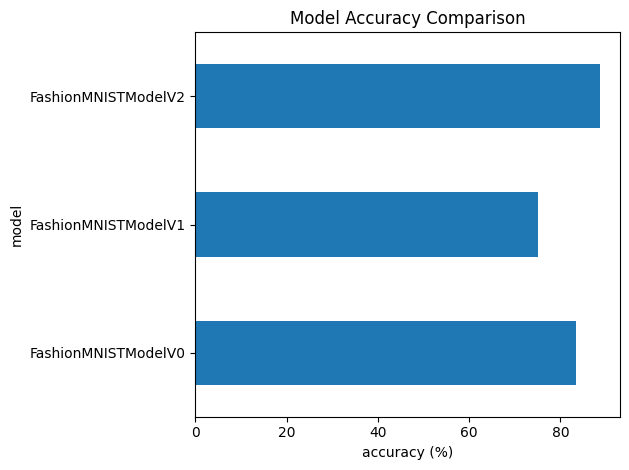

In [47]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")  # Set 'model_name' as the index and plot 'model_acc' as a horizontal bar chart
plt.xlabel("accuracy (%)")  # Set the label for the x-axis to display accuracy in percentage
plt.ylabel("model")  # Set the label for the y-axis to display model names
plt.title("Model Accuracy Comparison")  # (Optional) Add a title to the plot for better context
plt.tight_layout()  # (Optional) Adjust the layout to prevent clipping of labels
plt.show()  # Display the plot

## 9. Make and evaluate random predictions with best model



Alright, we've compared our models to each other, let's further evaluate our best performing model, `model_2`.

To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.

In [48]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    """
    Generates prediction probabilities for a given model and dataset.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        data (list): List of input data samples.
        device (torch.device): Device to run the model on (e.g., 'cpu' or 'cuda').

    Returns:
        torch.Tensor: Tensor containing prediction probabilities for each input sample.
    """
    pred_probs = []  # List to store prediction probabilities
    model.eval()  # Set model to evaluation mode to disable dropout, batchnorm, etc.
    with torch.inference_mode():  # Disable gradient calculation to save memory and computation
        for sample in data:  # Iterate through each sample in the input data
            # Prepare sample: add an extra batch dimension (unsqueeze) and move it to the specified device
            sample = torch.unsqueeze(sample, dim=0).to(device)  # Unsqueeze is necessary because model expects a batch dimension

            # Perform a forward pass through the model to get raw output logits
            pred_logit = model(sample)

            # Convert logits to probabilities using the softmax function
            # Softmax is applied across the "logits" dimension (dim=0) since batch size is 1
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Move probabilities back to the CPU for further processing b/c libraries like numpy don't support GPU tensors
            pred_probs.append(pred_prob.cpu())

    # Stack the list of prediction probabilities into a single tensor
    return torch.stack(pred_probs)

In [49]:
import random  # Import the random module for random sampling

random.seed(42)  # Set the random seed to ensure reproducibility of results

test_samples = []  # Initialize an empty list to store selected test samples
test_labels = []   # Initialize an empty list to store corresponding labels

# Randomly select 9 (k=9) unique samples from the test_data
for sample, label in random.sample(list(test_data), k=9):   # k=9 is a randomly selected number of samples from test dataset
    test_samples.append(sample)  # Add the selected sample to the test_samples list
    test_labels.append(label)    # Add the corresponding label to the test_labels list

# Display the shape of the first test sample and its label with the class name
print(
    f"Test sample image shape: {test_samples[0].shape}\n"
    f"Test sample label: {test_labels[0]} ({class_names[test_labels[0]]})"
)

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


And now we can use our `make_predictions()` function to predict on `test_samples`.

In [50]:
# Make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2,
                             data=test_samples)  # Invoke the make_predictions function using model_2 and the prepared test_samples

# View first two prediction probabilities list
pred_probs[:2]  # Retrieve and display the prediction probabilities for the first two test samples

tensor([[8.1303e-07, 7.9265e-08, 4.1449e-08, 3.3541e-08, 9.6054e-09, 9.9989e-01,
         1.1818e-06, 2.2627e-06, 3.1423e-05, 7.1863e-05],
        [1.4934e-01, 6.0926e-01, 3.2524e-03, 1.8190e-01, 3.8729e-02, 3.0554e-05,
         1.6591e-02, 3.2708e-04, 4.2868e-05, 5.3429e-04]])

Excellent!

And now we can go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [51]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [52]:
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

Now our predicted classes are in the same format as our test labels, we can compare.

Since we're dealing with image data, let's stay true to the data explorer's motto.

"Visualize, visualize, visualize!"

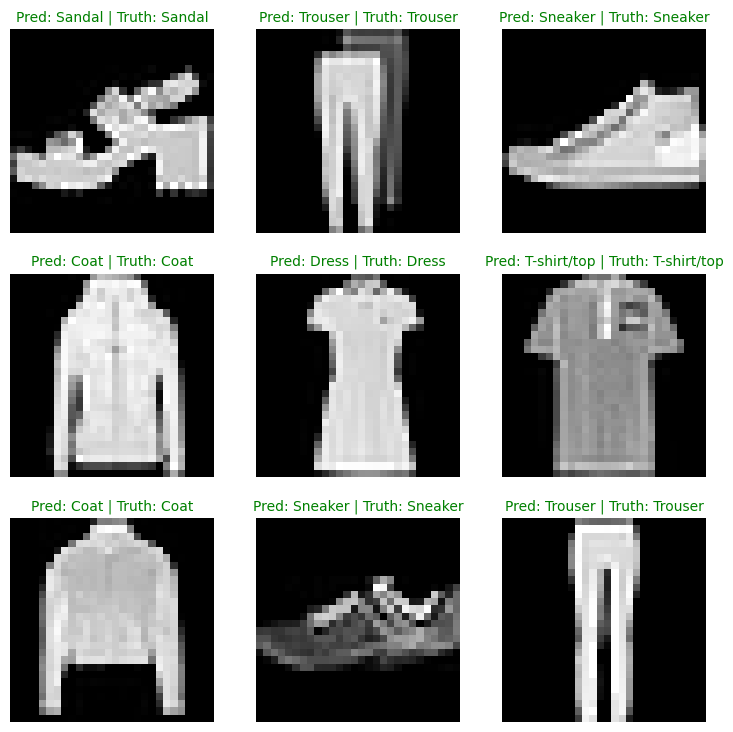

In [53]:
# Plot predictions
plt.figure(figsize=(9, 9))  # Initialize a new figure with a specified size of 9x9 inches
nrows = 3  # Define the number of rows in the subplot grid
ncols = 3  # Define the number of columns in the subplot grid

for i, sample in enumerate(test_samples):  # Iterate over each test sample with its index. i starts from 0
    # Create a subplot in the grid at position i+1
    plt.subplot(nrows, ncols, i + 1)    # i+1 because indexing starts from 0

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")  # Display the image after removing any singleton dimensions and use a grayscale colormap

    # Find the prediction label (in text form, e.g., "Sandal")
    pred_label = class_names[pred_classes[i]]  # Map the predicted class index to its corresponding class name

    # Get the truth label (in text form, e.g., "T-shirt")
    truth_label = class_names[test_labels[i]]  # Map the true class index to its corresponding class name

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"  # Format the title to show both predicted and true labels

    # Check for equality and change title color accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")  # Set title with green color if prediction is correct
    else:
        plt.title(title_text, fontsize=10, c="r")  # Set title with red color if prediction is incorrect

    plt.axis(False)  # Hide the axis ticks and labels

Well, well, well, doesn't that look good!

Not bad for a couple dozen lines of PyTorch code!

## 10. Making a confusion matrix for further prediction evaluation



There are many [different evaluation metrics](https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics) we can use for classification problems.

One of the most visual is a [confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

A confusion matrix shows you where your classification model got confused between predictions and true labels.

To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `model_2` (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).

Let's start by making predictions with our trained model.

### 10.1 Making predictions

In [54]:
# Import tqdm for progress bar
from tqdm.auto import tqdm  # tqdm.auto automatically selects the best progress bar format based on the environment

# 1. Make predictions with trained model
y_preds = []  # Initialize an empty list to store prediction results
model_2.eval()  # Set the model to evaluation mode to disable dropout and other training-specific layers

with torch.inference_mode():  # Disable gradient calculations for faster and memory-efficient inference
    for X, y in tqdm(test_dataloader, desc="Making predictions"):  # Iterate over the test dataloader with a progress bar
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)  # Move input features X and labels y to the specified device (CPU or GPU)

        # Do the forward pass
        y_logit = model_2(X)  # Perform a forward pass through model_2 to obtain raw output logits

        # Turn predictions from logits -> prediction probabilities -> predictions labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Apply softmax to convert logits to probabilities across the class dimension (dim=1)
        # Then, use argmax to get the predicted class labels by selecting the index with the highest probability

        # Put predictions on CPU for evaluation
        y_preds.append(y_pred.cpu())  # Move the predicted labels to CPU and append them to the y_preds list

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)  # Combine all prediction tensors in y_preds into a single tensor for further evaluation
y_pred_tensor[:10]                  # Print the first 10 predicted labels

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

### 10.2 torchmetrics and mlxtend

In [55]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend  # Attempt to import the torchmetrics and mlxtend libraries
    print(f"mlxtend version: {mlxtend.__version__}")  # Print the currently installed version of mlxtend
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
    # Ensure that the minor version of mlxtend is at least 19 (i.e., version 0.19.0 or higher)
except:
    %pip install -q torchmetrics -U mlxtend  # Install or upgrade torchmetrics and mlxtend quietly
    # Note: If you're using Google Colab, installing packages may require restarting the runtime
    import torchmetrics, mlxtend  # Re-import torchmetrics and mlxtend after installation
    print(f"mlxtend version: {mlxtend.__version__}")  # Print the updated version of mlxtend to confirm installation

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 18.7 MB/s eta 0:00:00
mlxtend version: 0.23.3


To plot the confusion matrix, we need to make sure we've got and [`mlxtend`](http://rasbt.github.io/mlxtend/) version of 0.19.0 or higher.

In [56]:
# Import mlxtend upgraded version. This code makes sure mlxtend is at least version 0.19.0
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.3


### 10.3 Confusion matrix



#### 1. How Does the `ConfusionMatrix` Instance Work?



- **Instance Behavior**:
  - The `ConfusionMatrix` class from `torchmetrics` allows its instances to be callable because it implements a special method called `__call__`.
  - When you write `confmat(preds=y_pred_tensor, target=test_data.targets)`, this internally invokes the `__call__` method of the `ConfusionMatrix` instance.

- **Inputs to `__call__`**:
  - `preds`: Predicted labels from your model.
  - `target`: True labels from your dataset.
  - The method processes these inputs to compute the confusion matrix.

- **Documentation**:
  - For more details, refer to the official [TorchMetrics ConfusionMatrix Documentation](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html), which explains the input arguments and functionality.



#### 2. Setting Up and Plotting the Confusion Matrix



- **Imports**:
  - `ConfusionMatrix` computes the confusion matrix for evaluating classification models.
  - `plot_confusion_matrix` visualizes the confusion matrix.

- **Steps**:
  - A `ConfusionMatrix` instance is initialized with the number of classes (`num_classes`) and task type (`task='multiclass'`).
  - The instance is called with `preds` and `target` to compute the confusion matrix tensor.
  - The tensor is converted to a NumPy array and passed to `plot_confusion_matrix` for visualization.

- **Documentation**:
  - For more details, refer to the official [mlxtend `plot_confusion_matrix` Documentation](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)



#### 3. Importing and Verifying `mlxtend` Version



- **Purpose**:
  - Ensures compatibility with plotting features provided by `mlxtend`.
  - The version is checked to ensure it is at least 0.19.0.

#### Code Implementation

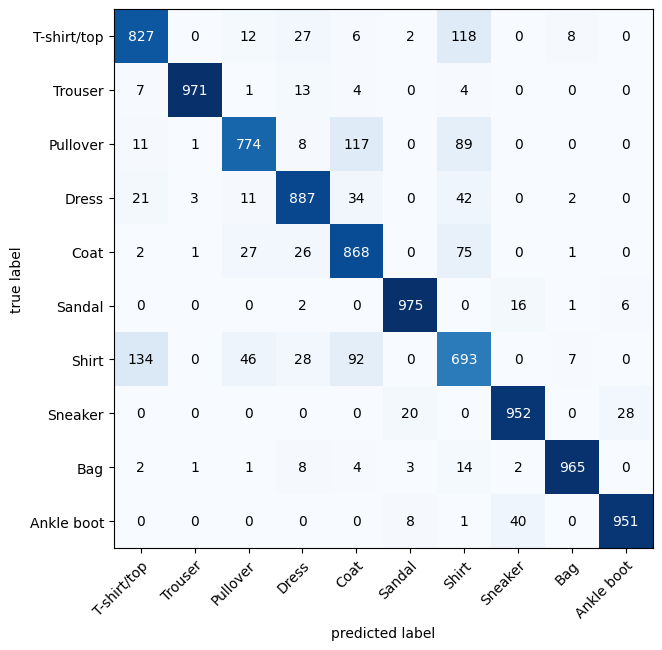

In [57]:
from torchmetrics import ConfusionMatrix  # Import the ConfusionMatrix class from torchmetrics
from mlxtend.plotting import plot_confusion_matrix  # Import the plot_confusion_matrix function from mlxtend.plotting

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),  # Specify the number of classes
                          task='multiclass')  # Indicate that this is a multiclass classification problem
confmat_tensor = confmat(preds=y_pred_tensor,  # Compute the confusion matrix using predicted labels
                         target=test_data.targets)  # Compare against true target labels

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),  # Convert the confusion matrix tensor to a NumPy array for compatibility
                                class_names=class_names,          # Provide class names for labeling axes of the confusion matrix
                                figsize=(10, 7))                  # Set the figure size to 10 inches by 7 inches for better visualization



Woah! Doesn't that look good?

We can see our model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use *where* a model is getting things wrong.

It also hints at *why* the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualizing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## 11. Save and load best performing model



Let's finish this section off by saving and loading in our best performing model.

Recall from [notebook 01](https://www.learnpytorch.io/01_pytorch_workflow/#5-saving-and-loading-a-pytorch-model) we can save and load a PyTorch model using a combination of:
* `torch.save` - a function to save a whole PyTorch model or a model's `state_dict()`.
* `torch.load` - a function to load in a saved PyTorch object.
* `torch.nn.Module.load_state_dict()` - a function to load a saved `state_dict()` into an existing model instance.

You can see more of these three in the [PyTorch saving and loading models documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

For now, let's save our `model_2`'s `state_dict()` then load it back in and evaluate it to make sure the save and load went correctly.

In [58]:
from pathlib import Path  # Import Path class from pathlib for handling filesystem paths

# Create models directory (if it doesn't already exist)
# Reference: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")  # Define the path for the models directory
MODEL_PATH.mkdir(
    parents=True,  # Create any necessary parent directories
    exist_ok=True   # Do not raise an error if the directory already exists
)

# Define the name and full path for saving the model
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"  # Name of the model file
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME  # Combine directory and filename to get full save path

# Save the model's state dictionary to the specified path
print(f"Saving model to: {MODEL_SAVE_PATH}")  # Inform the user where the model is being saved
torch.save(
    obj=model_2.state_dict(),  # Extract the state dictionary (learned parameters) from model_2
    f=MODEL_SAVE_PATH           # Specify the file path where the state dictionary will be saved
)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [59]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

<ipython-input-59-01e1a5266d0e>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


And now we've got a loaded model we can evaluate it with `eval_model()` to make sure its parameters work similarly to `model_2` prior to saving.

In [60]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31292983889579773,
 'model_acc': 88.63817891373802}

Do these results look the same as `model_2_results`?

In [61]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31292983889579773,
 'model_acc': 88.63817891373802}

We can find out if two tensors are close to each other using `torch.isclose()` and passing in a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

If our model's results are close, the output of `torch.isclose()` should be true.

In [62]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)

## Exercises



All of the exercises are focused on practicing the code in the sections above.

You should be able to complete them by referencing each section or by following the resource(s) linked.

All exercises should be completed using [device-agnostic code](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

**Resources:**
* [Exercise template notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb)
* [Example solutions notebook for 03](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/03_pytorch_computer_vision_exercise_solutions.ipynb) (try the exercises *before* looking at this)

1. What are 3 areas in industry where computer vision is currently being used?
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).
    * Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.
5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.
6. Visualize at least 5 different samples of the MNIST training dataset.
7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.
8. Recreate `model_2` used in this notebook (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.
9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.
10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.
11. Plot a confusion matrix comparing your model's predictions to the truth labels.
12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?
13. Use a model similar to the trained `model_2` from this notebook to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
    * Then plot some predictions where the model was wrong alongside what the label of the image should've been.
    * After visualizing these predictions do you think it's more of a modelling error or a data error?
    * As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## Extra-curriculum
* **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.
* Spend 10-minutes clicking through the different options of the [PyTorch vision library](https://pytorch.org/vision/stable/index.html), what different modules are available?
* Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the [`torchvision.models`](https://pytorch.org/vision/stable/models.html) library? What do you think you could do with these?
* For a large number of pretrained PyTorch computer vision models as well as many different extensions to PyTorch's computer vision functionalities check out the [PyTorch Image Models library `timm`](https://github.com/rwightman/pytorch-image-models/) (Torch Image Models) by Ross Wightman.